In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read Data

In [2]:
coal_train_data = pd.read_csv('Data/COALINDIA TRAIN.csv')

# Dropping Null values

In [3]:
coal_train_data.dropna(inplace=True)

# Prepare Data

In [4]:
X_train = coal_train_data[['Open','High','Low','Volume']]
Y_train = coal_train_data['Close']

# Model Training

In [5]:
model = xgb.XGBRegressor(
    n_estimators=100,     
    learning_rate=0.1,     
    max_depth=3,           
    min_child_weight=1,    
    subsample=0.8,         
    colsample_bytree=0.8,  
    random_state=42        
)

In [6]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

# Model Testing

In [7]:
coal_test_data = pd.read_csv('Data/COALINDIA TEST.csv')

In [8]:
coal_test_data.isna().sum()

Date         186
Open         186
High         186
Low          186
Close        186
Adj Close    186
Volume       186
dtype: int64

In [9]:
coal_test_data.dropna(inplace=True)

In [10]:
X_test = coal_test_data[['Open','High','Low','Volume']]

In [11]:
Y_test = coal_test_data['Close']

In [12]:
Y_pred = model.predict(X_test)

# Error Metrics

In [13]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error: 1.5057535237052688
Mean Squared Error: 3.6542710314444866
Root Mean Squared Error: 1.9116147706702014
R-squared (R2) Score: 0.859374207092394


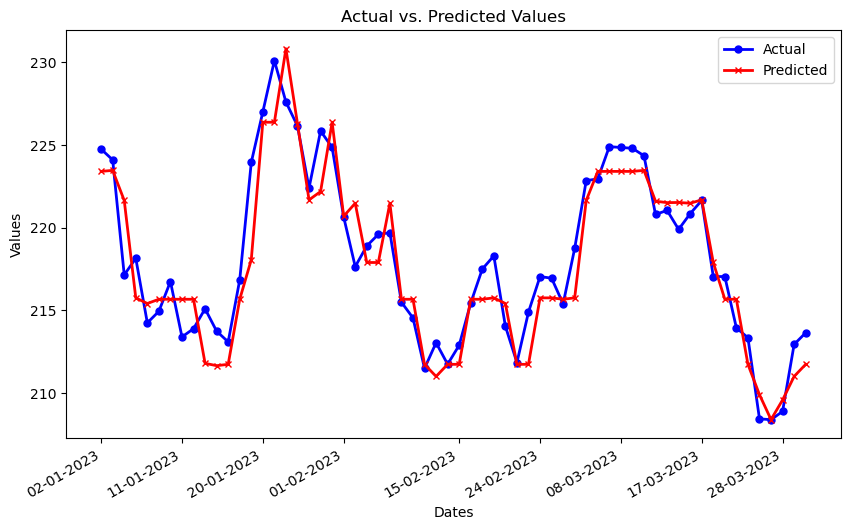

In [14]:
x = coal_test_data['Date']
plt.figure(figsize=(10, 6))
plt.plot(x,Y_test, label='Actual', color='blue', marker='o', markersize=5, linewidth=2)
plt.plot(x,Y_pred, label='Predicted', color='red', marker='x', markersize=5, linewidth=2)

# Set axis labels and title
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
locator = mdates.AutoDateLocator()
# Add legend
plt.legend()
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()
